# Random Forests Using Dropped Columns

In [6]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sqlalchemy as sql
%matplotlib inline

## Loading and Preprocessing Loans Encoded Data

In [7]:
# Loading data
bc_df = pd.read_csv("data/breast-cancer.csv")
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
engine = sql.create_engine('sqlite:///data/DataBase.sqlite')

In [9]:
bc_df.to_sql('data', con=engine, index=False, if_exists='replace')

569

In [11]:
conn = engine.connect()

In [13]:
bc_db = pd.read_sql("SELECT * FROM data", conn)
bc_db.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
X2 = bc_db.copy()

In [16]:
X2.drop(["id","diagnosis", "compactness_worst","texture_worst","texture_mean","perimeter_se","compactness_mean","smoothness_worst",
"fractal_dimension_worst","symmetry_worst","smoothness_mean","concave points_se","concavity_se","texture_se","compactness_se",
"fractal_dimension_se","symmetry_se","fractal_dimension_mean","symmetry_mean","smoothness_se","perimeter_mean","area_se",
"area_mean","radius_mean","radius_se",'concavity_mean','concave points_worst'], axis=1, inplace=True)
X2.head()

,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst
0,0.14710,25.38,184.60,2019.0,0.7119
1,0.07017,24.99,158.80,1956.0,0.2416
2,0.12790,23.57,152.50,1709.0,0.4504
3,0.10520,14.91,98.87,567.7,0.6869
4,0.10430,22.54,152.20,1575.0,0.4000


In [73]:
# Define features set. based on feature analysis, drop everything but the top five feature importance. 
# X = bc_df.copy()
# X.drop(["id","diagnosis", "compactness_worst","texture_worst","texture_mean","perimeter_se","compactness_mean","smoothness_worst",
# "fractal_dimension_worst","symmetry_worst","smoothness_mean","concave points_se","concavity_se","texture_se","compactness_se",
# "fractal_dimension_se","symmetry_se","fractal_dimension_mean","symmetry_mean","smoothness_se","perimeter_mean","area_se",
# "area_mean","radius_mean","radius_se",'concavity_mean','concave points_worst'], axis=1, inplace=True)
# X.head()

,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst
0,0.14710,25.38,184.60,2019.0,0.7119
1,0.07017,24.99,158.80,1956.0,0.2416
2,0.12790,23.57,152.50,1709.0,0.4504
3,0.10520,14.91,98.87,567.7,0.6869
4,0.10430,22.54,152.20,1575.0,0.4000


In [18]:
y2 = bc_db["diagnosis"].ravel()
y2[:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [74]:
# Define target vector
# y = bc_df["diagnosis"].ravel()
# y[:5]


array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=78)

In [75]:
# Splitting into Train and Test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [21]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [22]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [23]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [24]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [25]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [26]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [27]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,79,5
Actual 1,3,56


Accuracy Score : 0.9440559440559441
Classification Report
              precision    recall  f1-score   support

           B       0.96      0.94      0.95        84
           M       0.92      0.95      0.93        59

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



## Feature Importance

In [30]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X2.columns), reverse=True)

[(0.2792709268360847, 'perimeter_worst'),
 (0.2742197826952542, 'concave points_mean'),
 (0.18497466449346464, 'radius_worst'),
 (0.1741326813631644, 'area_worst'),
 (0.08740194461203211, 'concavity_worst')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

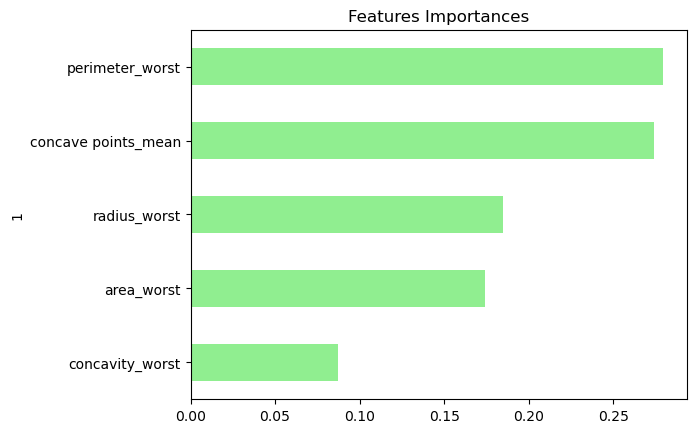

In [31]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X2.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

Trying dropping columns

In [86]:
importances_sorted.columns

Index(['Feature Importances'], dtype='object')